# Import libraries

In [1]:
# Import pandas, numpy and madplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlin
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# Load the data

## Load the EdGap data set

In [4]:
edgap = pd.read_excel(
    '/Users/jackneton/Desktop/Grad School/DATA 5100/education/data/EdGap_data.xlsx',
    dtype = {'NCESSCH School ID': object}
)


/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## Load the school information data set

In [13]:
# Add encoding parameter to handle non-UTF-8 characters
sinfo = pd.read_csv(
     '/Users/jackneton/Desktop/Grad School/DATA 5100/education/data/ccd_sch_029_1617_w_1a_11212017.csv',
     encoding="unicode_escape")

/var/folders/nf/xj9w2p992vzfzsk5h40k9hb40000gn/T/ipykernel_61279/1579116559.py:2: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  sinfo = pd.read_csv(


## Explore the contents of the data sets

### Start by looking at the head of each data frame

This will let us see the names of the columns and a few example values for each column. We can also check whether the data is in tidy format.

In [15]:
edgap.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

Number of percentage variables represented as proportions; Everything else looks appropriate.

In [16]:
sinfo.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  ...  \
0  Alabama Youth Services               1    NaN   AL-210  100002  ...   
1  Alabama Youth Services               1    NaN   AL-210  100002  ...   
2  Alabama Youth Services               1    NaN   AL-210  100002  ...   
3  Alabama Youth Services               1    NaN   AL-210  100002  ...   
4  Alabama Youth Services               1    NaN   AL-210  100002  ...   

  G_10_OFFERED  G_11_OFFERED  G_12_OFFERED G_13_OFFERED G_UG_OFFERED  \
0          Yes           Yes           Yes           No           No   
1          Yes           Yes           Yes           No           No   
2          Yes           Yes           Yes           No           No   
3          Yes           Yes           Yes           No           No   
4          Yes           Yes           Yes           No           No   

  G_AE_OFFERED GSLO GSHI LEVEL    IGOFFERED  
0           No   07   12  High  As reported  
1           No   07   12  High  As reported  
2           No   07   12  High  As reported  
3           No   07   12  High  As reported  
4           No   07   12  High  As reported  

[5 rows x 65 columns]

Much more information in this data set than what we need for this project.

### Use the info method to check the data types, size of the dataframe, and numbers of missing values.

In [18]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


We have some null values for ACT and socioeconomic values; Data types look appropriate

In [19]:
sinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

School ID is a float here; it was an object in the edgap dataset

### Summary

1. The schools information data set is much larger than the EdGap data set. EdGap is missing schools.
2. There are missing values in each data set.
3. Each data set is tidy.
4. Datatypes of variables of interest look correct; however the school identifier is an object in EdGap and a float in schools info.

# Are the date suitable for answering the question?

Performa a quick EDA to determine if the data are sufficient to answer the question. If data are not sufficient, we don't want to wast time doing anything that will not be productive.

Make a pair plot to explore the relationships between the variables.

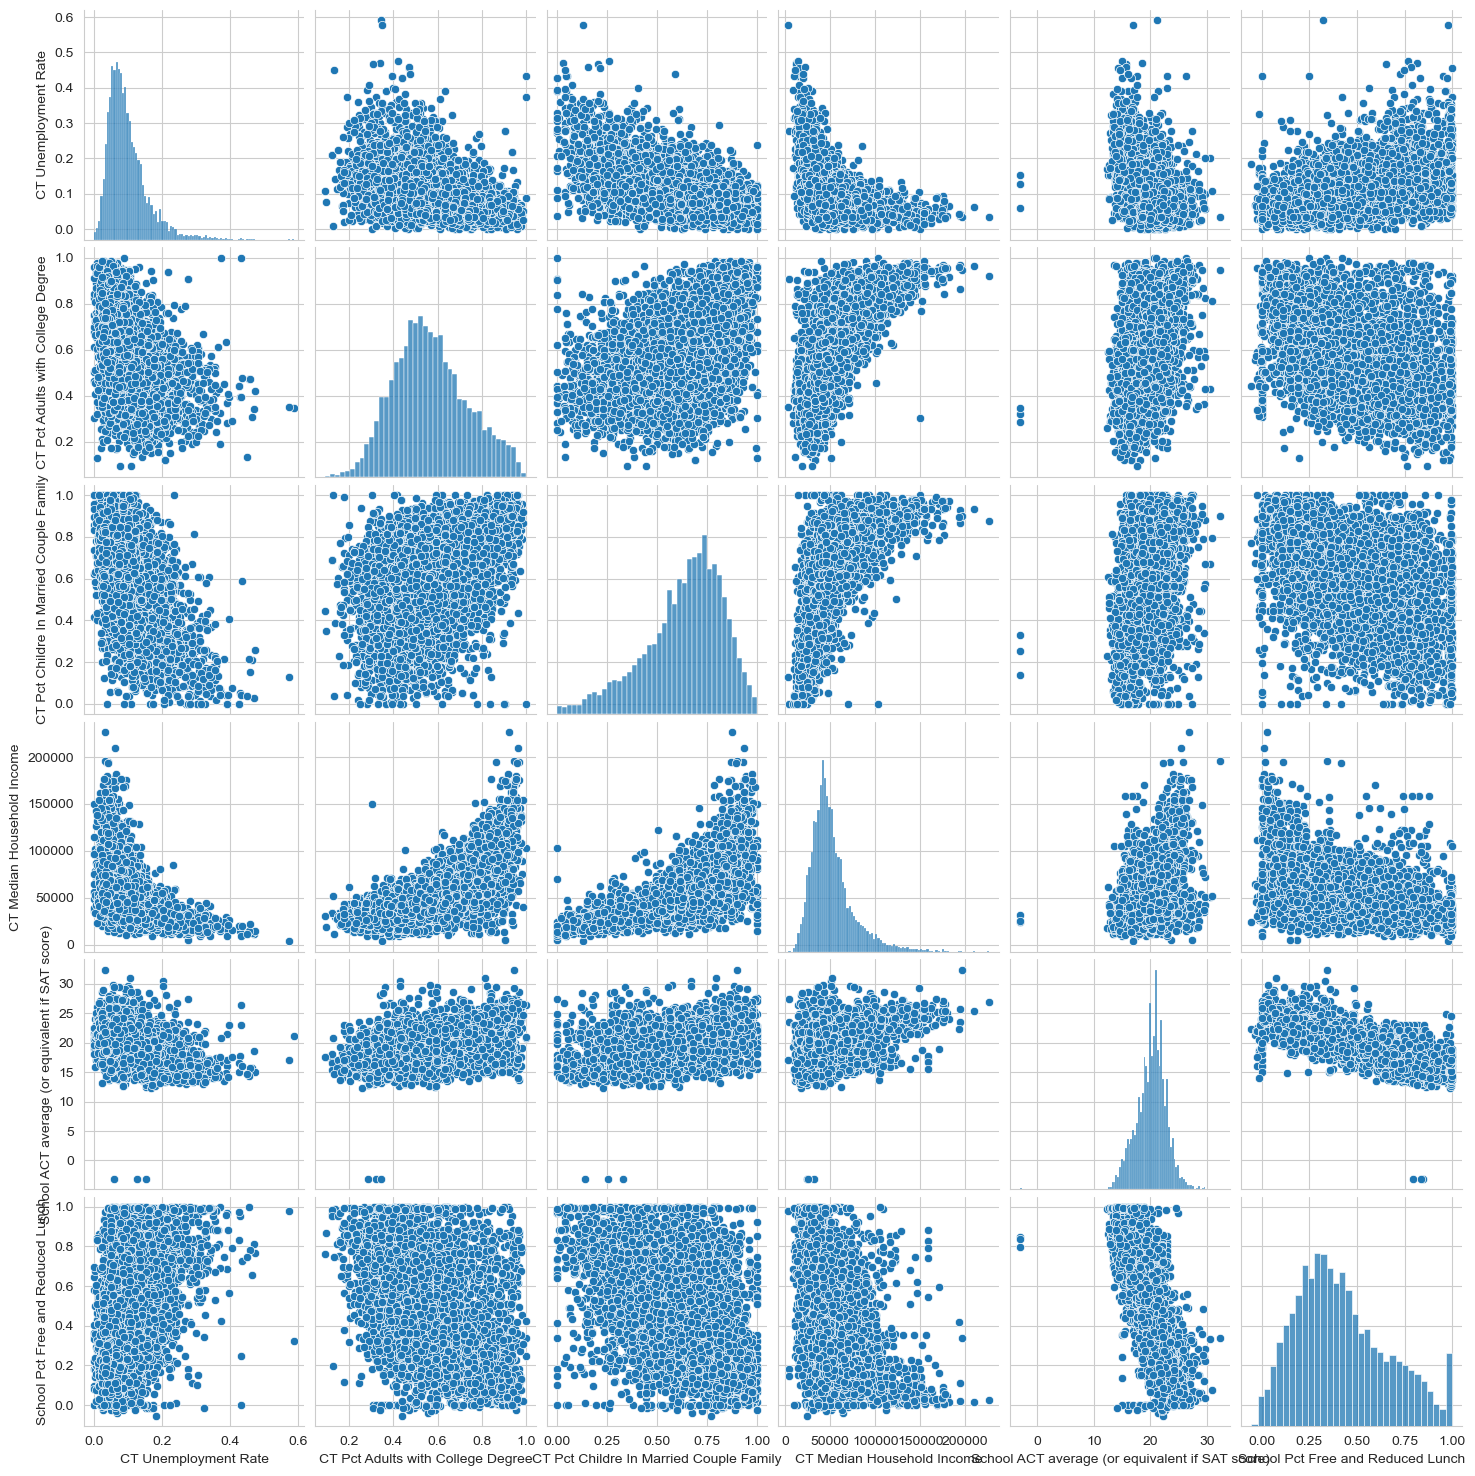

In [23]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID")
);
plt.show()

Is there a relationship between the socioeconomic variables and ACT score?
- Appears to be a relationship between the predictors and the ACT score

Any variables with unreasonable values?
- Looks like some negative values in ACT score, for example

### Add regression lines and format the pair plot

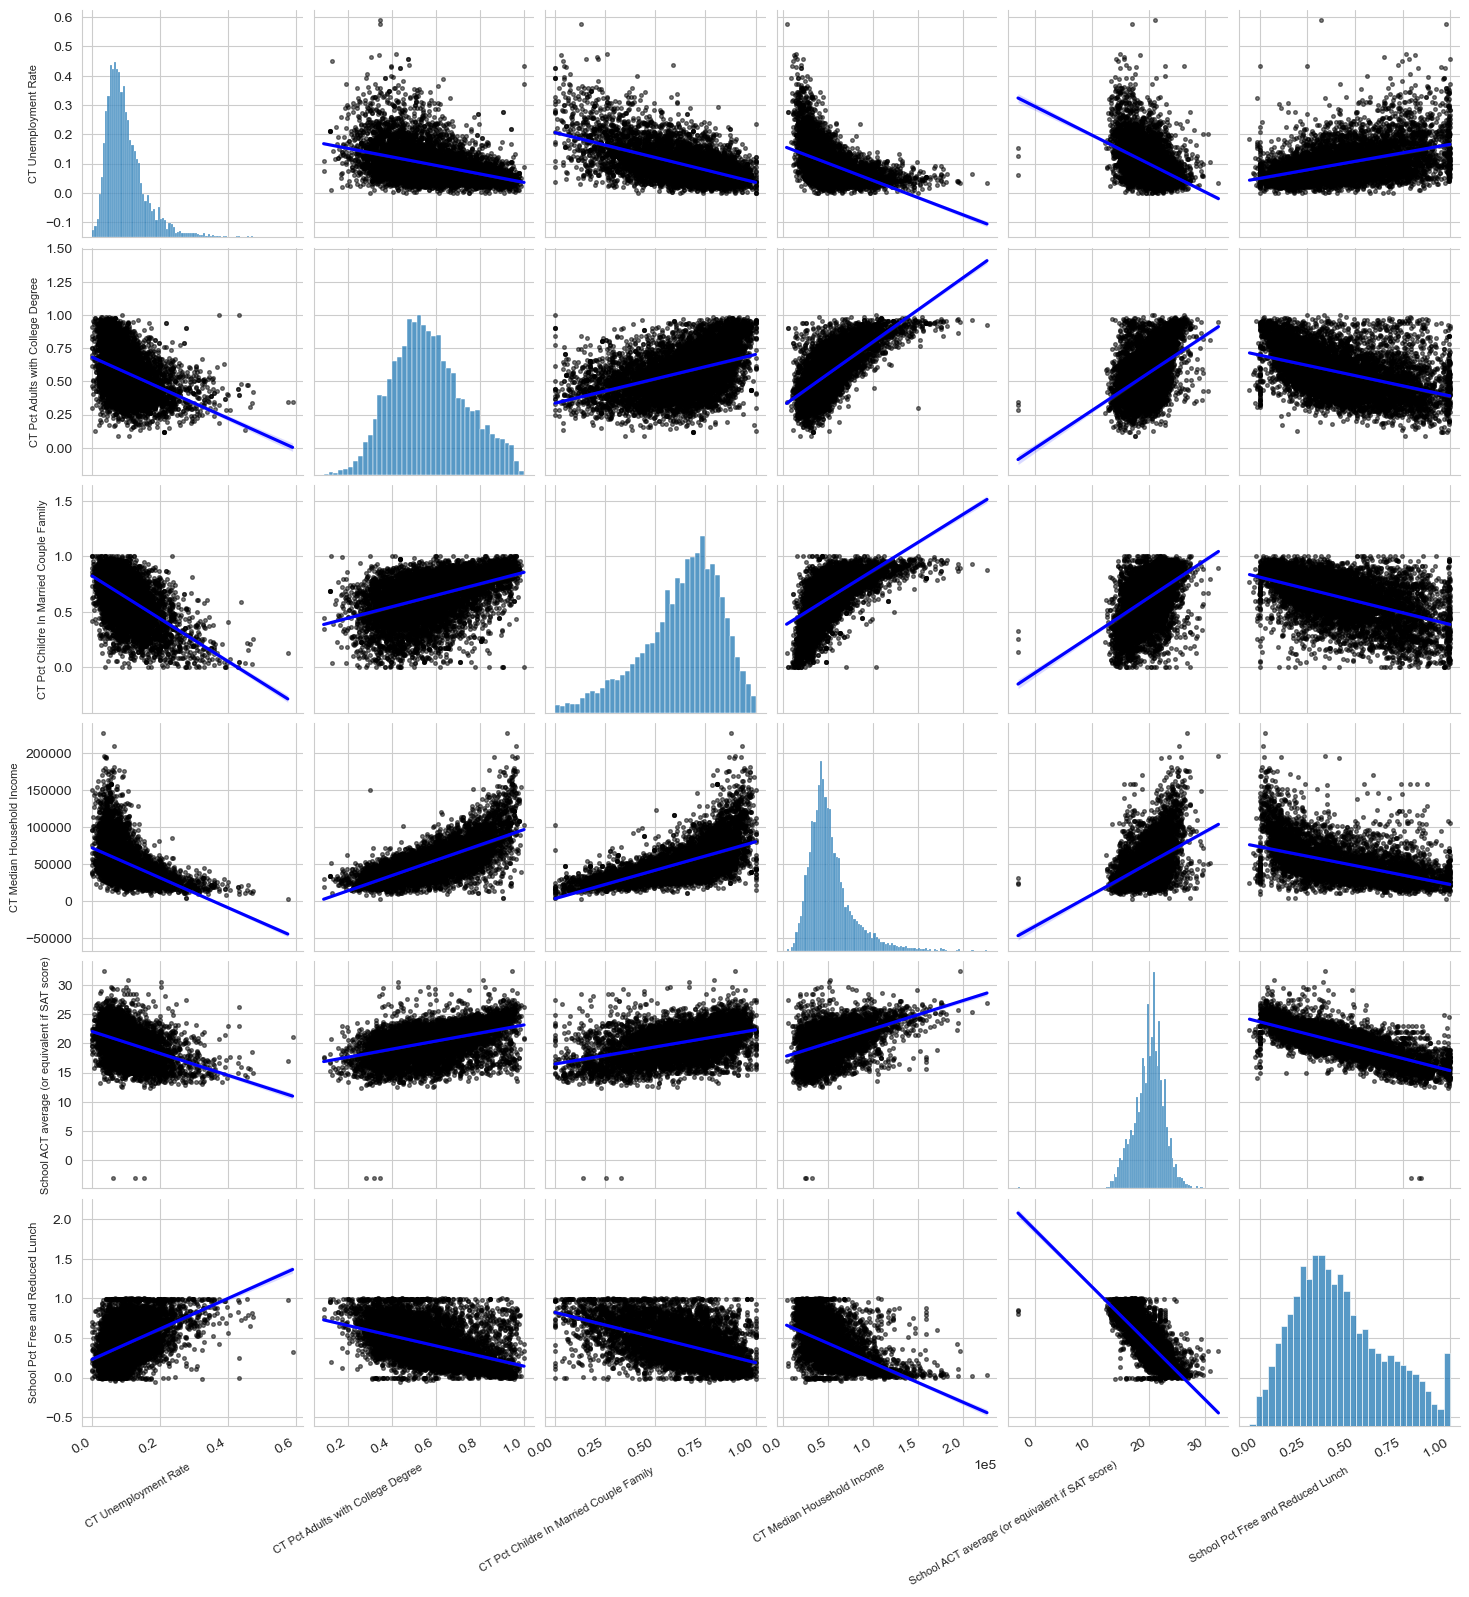

In [27]:
fig = sns.pairplot(
    edgap.drop(columns = "NCESSCH School ID"),
    kind = "reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
    ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8)

    #rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

plt.show()

Scientific notation makes it easier to see median income

### Plot a single row of interest 

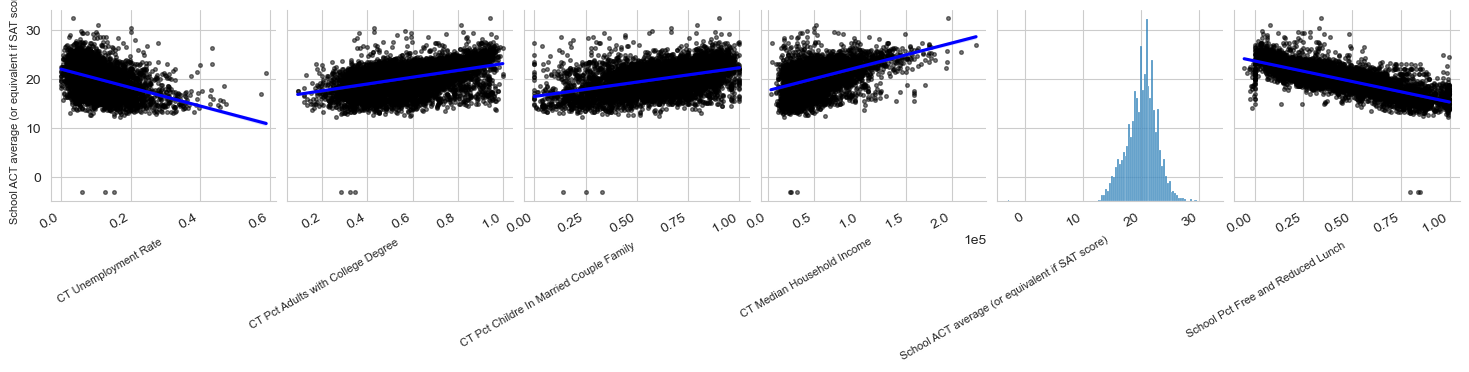

In [28]:
fig = sns.pairplot(
    edgap.drop(columns = "NCESSCH School ID"),
    y_vars = ['School ACT average (or equivalent if SAT score)'],
    kind = "reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
    ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8)

    #rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

plt.show()

Shows us the single row. Comments:
- There is a relationship between the socioeconomic variables and ACT score
- There are some out of range ACT and percent lunch values to deal with
- We can be confident that it is worthwhile to spend time preparing the data for analysis

# Data Preparation

## Select relevant subsets of the data

The school information data set contains many columns. We only need the year, school id, location, and school type.

Keep the columns school_year, ncessch, lstate, lzip, sch_type_text, level, charter_text

In [29]:
sinfo = sinfo[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [30]:
sinfo.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT  
0           No  
1           No  
2           No  
3           No  
4           No

Rename the columns to simplify understanding, following snake case convention

In [32]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [33]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [35]:
sinfo = sinfo.rename(
    columns = {
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In [37]:
sinfo.head()

year            id state zip_code         school_type school_level  \
0  2016-2017  1.000020e+10    AL    35220  Alternative School         High   
1  2016-2017  1.000020e+10    AL    36067  Alternative School         High   
2  2016-2017  1.000020e+10    AL    36784  Alternative School         High   
3  2016-2017  1.000020e+10    AL    36057  Alternative School         High   
4  2016-2017  1.000020e+10    AL    35206  Alternative School         High   

  charter  
0      No  
1      No  
2      No  
3      No  
4      No

Now we have simplified dataframes.

### Summary
1. We selected a subset of columns of the school information data set.
2. We renamed the columns for clarity and to follow formatting guidelines.
3. We are ready to join the dataframes.

## Join the data frames

Use the ID as the key.

Need to cast sinfo school id column as object type before joining.

In [38]:
sinfo['id'] = sinfo['id'].astype('object')

In [39]:
sinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


School ID is now an object and we can join with school ID in edgap.

Keep all information from edgap data set, bringing in information from sinfo where we have information about socieconomic and ACT variables.

Use a left join on edgap to achieve this.

In [41]:
df = edgap.merge(
    sinfo,
    how = 'left',
    on = 'id'
)

In [42]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

Combined datasets; we have ID, all edgap information, and information from sinfo where we had corresponding schools.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


### Summary
1. We joined the data sets using the school id as the key.
2. We first cast the id as an object to have the same data type for the key in each data set.
3. We used a left join to keep all EdGap data.

# Quality Control

Use describe() method to compute descriptive statistics for numerical variables.

In [44]:
# use min and max, filtering for numerical variables only
df.select_dtypes(include = ['number']).agg(['min', 'max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  
min        -3.07          -0.05  
max        32.36           1.00

There are some out of range values:
1. We see negative values in ACT, where ACT scores are 1-36.
2. Negative values in school lunch, should not be below zero.

### Set out-of-range values to NaN using np.nan

We do this to retain all the information that's present for those schools, rather than just deleting the record entirely.

In [46]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [47]:
df.loc[df['average_act'] < 0, 'average_act'] = np.nan

### Check types, levels, and charter status of schools

In [48]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [49]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [50]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

1. Seems reasonable to keep all school types.
2. We will likely only keep high schools, given the perview of the project.

### Keep only the high schools

In [51]:
df = df.loc[df['school_level'] == 'High']

In [52]:
df['school_level'].value_counts()

school_level
High    7230
Name: count, dtype: int64

### Check for any duplicated rows

In [53]:
df.duplicated().sum()

np.int64(0)

No duplicated rows in our dataset; do not have to worry about dropping any of them.

We are not going to look through original records for incorrectly recorded values.

# Identify missing values

How many values of each variable are missing?

In [54]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

Several missing values for edgap variables, but not sinfo.

In [57]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name= 'Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
charter                              0.00

We have very few values missing.

### What states do we have data from?

In [58]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [59]:
df['state'].unique()

array(['DE', 'FL', 'GA', 'IL', 'IN', 'KY', 'LA', 'MA', 'MI', 'MO', 'NJ',
       'NY', 'NC', 'OH', 'PA', 'TN', 'TX', 'WA', 'WI', 'WY'], dtype=object)

We do not have every state. We only have information from 20 states.

Missing a lot of information because it's not in the data set, not only because we have missing entries.

### Plot the results on a map

In [61]:
import plotly.offline as po
import plotly.graph_objs as pg

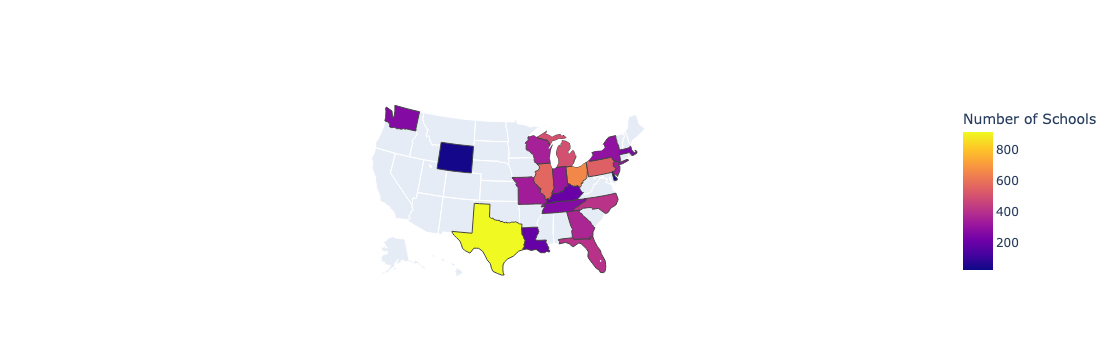

In [62]:
layout = dict(
    geo = {"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout = layout)

po.iplot(x)

Shows where we have our values. Useful to understand where the data are coming from.

We are missing a large amount due to omission.

### Drop rows where the average ACT score is missing

Small percentage of dataset, we don't have to be too careful when dropping.

In [63]:
df = df.dropna(subset=['average_act'])

In [64]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

No more NaNs for ACT

No dropping socioeconomic variables as this would negatively affect our analysis where data were present.

We will impute, instead.

### Summary
1. We set out-of-range values to NaN and will impute them.
2. We kept only high schools.
3. We removed schools with no ACT scores.
4. Many schools are missing from the data by omissions.
5. We will impute the missing values of socioeconomic variables.

# Data imputation

No adding of information; taking data we have and replacing NaNs with valeus we can estimate from the data.

Define the predictor variables.

In [68]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

### Use interative imputer to replace missing values

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [71]:
imputer = IterativeImputer() #creating imputer object

Fit the imputer using the numerical predictor variables

In [72]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


In [73]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

Learning the relationships between these columns.

Apply transform method to replace the NaN values in the dataframe.

In [75]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Check to see if values were replaced.

In [76]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

No more missing values remain.

# Export a clean data set

In [77]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False
)

### Summary
1. We used an iterative imputer to estimate missing values of numerical predictor variables.
2. We saved the clean data frame as a csv file.